# Introduction to Pandas and the Titanic Data Set
***

In this notebook you'll apply some basic Pandas tools to explore the ubiquitous **Titanic** dataset. 

<div>
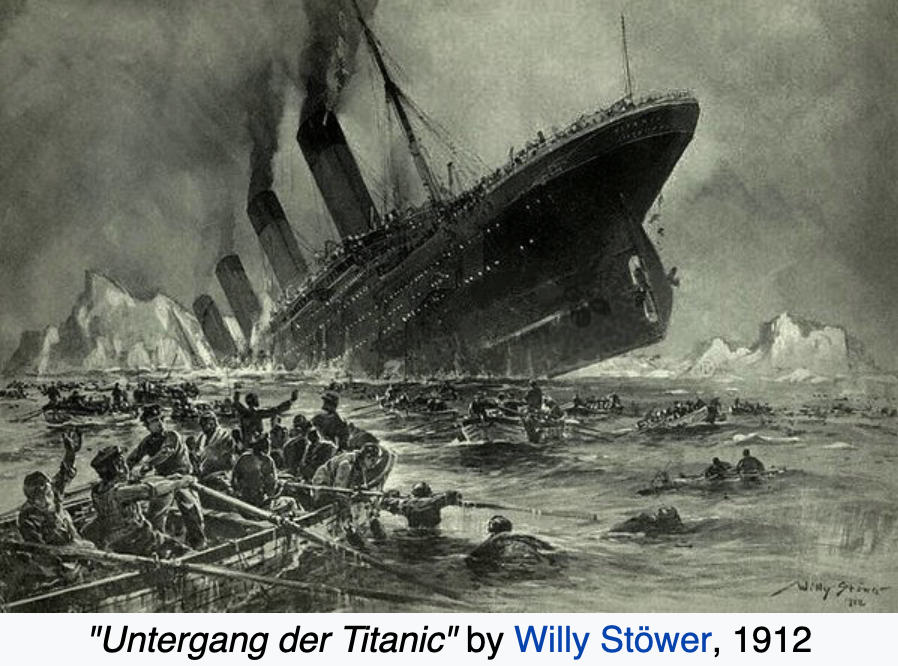
<div>

First, as always, we'll load Numpy and Pandas using their common aliases, np and pd. 

In [ ]:
import numpy as np 
import pandas as pd

The data is stored in a .csv file (a format that lists data separated by commas) called titanic_data.csv.  We'll import the data into Pandas using the read_csv( ) function.  

In [ ]:
# Path to the data - select the path that works for you 
file_path = 'titanic_data.csv'

# Load the data into a DataFrame 
df = pd.read_csv(file_path)

Take a look at the first few rows of the DataFrame using the head( ) method. 

From this you should see that each row in the DataFrame refers to a particular passenger on the Titanic.  The columns of the DataFrame give you specific information about each passenger.  The **PassengerId** is simply a unique identifier given to each passenger in the data set.  The rest of the attributes are more meaningful: 

- **Survived**: Indicates whether the passenger survived the sinking
- **Pclass**: Indicates the socio-economic status of the passenger (lower number means higher class)
- **Name**: The passenger's name 
- **Sex**: The passenger's sex 
- **Age**: The passenger's age
- **SibSp**: The number of siblings / spouses the passenger was traveling with 
- **Parch**: The number of children / parents the passenger was traveling with 
- **Ticket**: The passenger's ticket number 
- **Fare**: How much the passenger paid for their ticket 
- **Embarked**: The passenger's port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

### Exercise 1
***
Determine how many people survived the disaster, and how many passengers are in the data set total.

### Exercise 2  
***
Determine how many men and how many women survived the disaster 

### Exercise 3 
***
Determine how many children at or under the age of 12 survived the disaster, and how many children were present total.

### Exercise 4 
***
The **SibSp** and **Parch** attributes tell us the number of siblings/spouses and parents/children each passenger had on board.  Create a new column in the DataFrame called **Family** that indicates how many siblings/spouses/parents/children a passenger was traveling with. Then report how many people survived that were traveling with 3 or more family members. 

### Exercise 5 - Summary Statistics
***

Let's compute some sample statistics. First, we need to determine the data type of each column in the titanic dataset. To get this information, we can use the Pandas dataframe info method. Calling this method on our dataframe will give us the data type of each column, the total number of rows, and the memory usage.

In [ ]:
df.info()

Note that the numerical data lies in the PassengerID, Survived, Pclass, Age, SibSp, Parch, and Fare columns. 

We will learn how to compute the following summary statistics using various columns of our data frame.
- mean
- median
- standard deviation
- Tukey 5 Number Summary
- 25th Percentile
- 75th Percentile
- maximum
- minimum

**Part A**: Compute the mean Age of all passengers on the ship. Then compute the mean age of all the passengers who _survived_. Finally compute the mean age of all the passengers who _passed_. How do these compare?

In [ ]:
df.columns

**Part B:** Compute the median age of all passengers on the ship. Then compute the median age of all the passengers who _survived_. How do these compare?

**Part C**: Compute the standard deviation in passenger age among (1) all passengers and (2) the surviving passengers.

**Part D:** Now find the Tukey 5 number summary of the passenger age among (1) all passengers and (2) the surviving passengers.

The Tukey 5 number summary is: Minimum, 1st Quartile, Median, 3rd Quartile, and Maximum. The 1st Quartile is the 25th percentile. The 3rd Quartile is the 75th percentile of the data.

### Exercise 6 - Confidence Intervals
***

In the previous exercise, we computed the mean age of all the survivors aboard the Titanic alongside the mean age of all those who perished. The mean age of the survivors was less than the mean age of those who pased. We will now compute a Confidence Interval of the difference between the two means to see if we can gain any insight as to whether this difference in means iss statistically significant or not.

**What is a Confidence Interval?**

A confidence interval for a mean is an interval of real numbers that is symmetric about a sample mean. The idea is to construct an interval for a specified confidence level. 

For example, if you want to construct a 95% confidence interval, this means that the lower and upper values of the CI are computed using the $2.5^{th}$ and $97.5^{th}$ percentile values of a standard normal distribution. Additionally, a 95% confidence interval means that if we were able to construct 100 confidence intervals, we would expect 95 of them to contain the true population statistic.

There is a lot that we are glossing over here. We are applying the Central Limit Theorem for one thing; a major theorem which we are not discussing here. And we are making the assumption that the survivors group and the non-survivors group are independent of each other. This is likely not a true assumption, but we are making it nonetheless.

For now, let's simply apply the following formula to compute the confidence interval for the difference between the two means:

$$ (\bar{x_1}-\bar{x_2}) \pm z_{\alpha/2}\cdot \sqrt{\frac{\sigma_1^2}{n_1}+\frac{\sigma_2^2}{n_2}} $$

Since we do not know $\sigma_1$ or $\sigma_2$, we will estimate these with $s_1$, the standard deviation of the age of the survivor's group, and $s_2$, the standard deviation of the age of the non-surviving group.

How do we interpret this result? 

### Exercise 7 
***
In this exercise you will write some code to predict whether a person survived the disaster based on their information.  Obviously, you'll want to ignore the **Survived** attribute for this to avoid cheating. You'll store your predictions ($1$ if you predict survived, $0$ if you predict died) in a column of the DataFrame called **Prediction**.  You can then use the following function to see how accurate your prediction was. 

In [ ]:
def score_prediction(df):
    '''
    Function to score predictions.  
    Takes entire DataFrame as sole argument. 
    '''
    acc = (df["Survived"]==df["Prediction"]).sum() / len(df)
    print("Your accuracy is {0:.1f}%".format(100*acc))

There are several ways that we can accomplish this.  The first method we'll highlight is one that loops over every row in the DataFrame, makes a decision based on that row's attributes, and then sets the relevant prediction in the **Prediction** column.  As an example, we'll use a very naive heuristic that predicts that all males survive and all females die. 

In [ ]:
for passenger_index, passenger in df.iterrows():
    df.loc[passenger_index, "Prediction"] = 1 if df.loc[passenger_index, "Sex"] == 'male' else 0

We can check that our code actually did something using the head( ) function and observing that we do in fact have a column called **Prediction** populated with $1$'s and $0$'s. You can see that the $1$'s in the **Prediction** column do in-fact line up with "male" in the **Sex** column. 

In [ ]:
df.head(10)

Now, let's see how we did by passing our DataFrame into the score_prediction( ) function. 

In [ ]:
score_prediction(df)

And here we see that our naive prediction netted us a 22% prediction accuracy (which isn't very good, but you're going to make it better). 

OK, so looping over the data is one option, but in Python, unfortunately, it's not a very good option.  Python is an interpreted language, which means that loops are slow.  We didn't really notice it here, because our DataFrame only has around 700 rows in it, but on data sets with hundreds of thousands or millions of entries, loops can grind your day to a complete halt.  

It's better to use vectorized methods like Pandas apply( ) function combined with Python lambda functions.  One way to accomplish the same results as above is as follows: 

In [ ]:
df["Prediction"] = df["Sex"].apply(lambda s: 1 if s=="male" else 0)
df.head(10)

You can check that this produces the same result as the loop-based method. We can compare the speeds of the apply( ) method and the loop-based method using the Jupyter magic %timeit command.  


In [ ]:
# Loop-based method 
print("Timing loop-based method: ")
%timeit for passenger_index, passenger in df.iterrows(): df.loc[passenger_index, "Prediction"] = 1 if df.loc[passenger_index, "Sex"] == 'male' else 0
    
# Apply-based method 
print("Timing apply-based method: ")
%timeit df["Prediction"] = df["Sex"].apply(lambda s: 1 if s=="male" else 0)

Note that here ms is milliseconds and $\mu\textrm{s}$ is **micro**seconds.  You can hopefully see that the apply method is **tremendously** faster than the loop-based method. 

OK, let's do one more slightly more complicated example so that we can see how to use the apply( ) function with multiple inputs.  Suppose say that you want to predict that a person survived if they are male **AND** they were traveling alone (probably not a good heuristic but just go with it).  To do this we need values from both the **Sex** column and the **Family** column.  Here is the code:

In [ ]:
df["Prediction"] = df.apply(lambda row: 1 if row["Sex"]=="male" and row["Family"]==0 else 0, axis=1)
df.head()

Here the apply( ) function is applied to the entire DataFrame and the object passed to the lambda function is an entire row of the DataFrame.  We can then carve off the elements from the columns we're interested in and do our thing.  Let's see how we did! 

In [ ]:
score_prediction(df)

Minor improvement! OK, so you're job is to explore the data and see if you can cook up a custom prediction heuristic that does better than 31.1%!   

**Question to ponder:**  Compare the prediction accuracies that we have found using **Sex** as the only feature in our model, and using both **Sex** and **Family**.  What do you think is the effect of traveling with family on a man's odds of surviving the incident?

Much has been done with the Titanic data set. You can read/do more exercises with this data set here: https://www.kaggle.com/startupsci/titanic-data-science-solutions